In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
headbrain=pd.read_csv('headbrain.csv')
headbrain

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [3]:
headbrain.shape

(237, 4)

In [7]:
headbrain.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
headbrain.tail()

,Gender,AgeRange,HeadSize,BrainWeight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [5]:
headbrain.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
headbrain.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

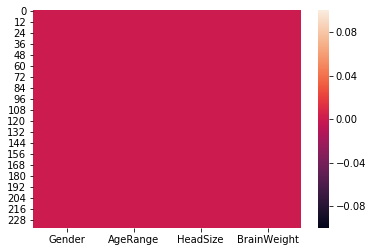

In [9]:
sns.heatmap(headbrain.isnull())

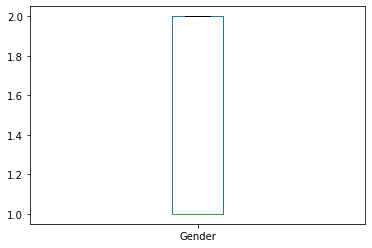

In [10]:
headbrain['Gender'].plot.box()

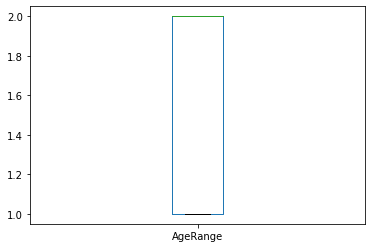

In [11]:
headbrain['AgeRange'].plot.box()


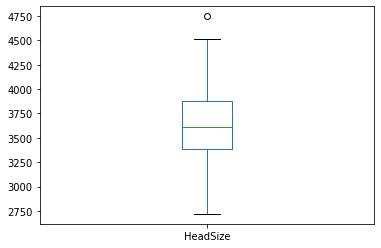

In [12]:
headbrain['HeadSize'].plot.box()

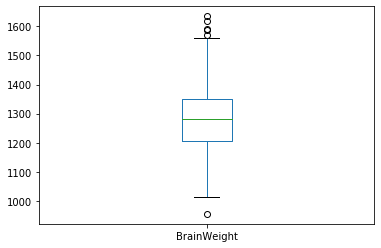

In [13]:
headbrain['BrainWeight'].plot.box()

Gender            AxesSubplot(0.125,0.125;0.168478x0.755)
AgeRange       AxesSubplot(0.327174,0.125;0.168478x0.755)
HeadSize       AxesSubplot(0.529348,0.125;0.168478x0.755)
BrainWeight    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

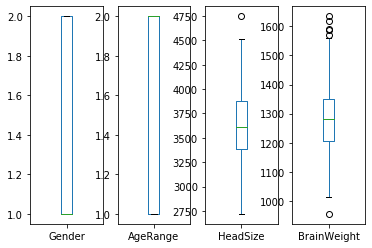

In [14]:
headbrain.plot(kind='box',subplots=True,layout=(1,4))

In [15]:
from scipy import stats
z = np.abs(stats.zscore(headbrain))
print(z)

[[0.8767307  1.07449777 2.40886829 2.0579083 ]
 [0.8767307  1.07449777 0.28535333 0.11763692]
 [0.8767307  1.07449777 1.72023489 0.43407603]
 [0.8767307  1.07449777 0.39235214 0.00727325]
 [0.8767307  1.07449777 1.4897759  2.557549  ]
 [0.8767307  1.07449777 0.13441126 0.14261896]
 [0.8767307  1.07449777 0.41430062 0.97535345]
 [0.8767307  1.07449777 0.2057438  0.23211156]
 [0.8767307  1.07449777 0.05759159 0.60062293]
 [0.8767307  1.07449777 0.95478182 0.76716983]
 [0.8767307  1.07449777 0.52399669 0.47571276]
 [0.8767307  1.07449777 0.98496097 0.80880656]
 [0.8767307  1.07449777 0.01648451 0.60062293]
 [0.8767307  1.07449777 1.57482624 1.99128954]
 [0.8767307  1.07449777 0.54324791 0.62349678]
 [0.8767307  1.07449777 0.66396452 1.01699018]
 [0.8767307  1.07449777 0.37584448 0.62560497]
 [0.8767307  1.07449777 0.46089482 0.0760002 ]
 [0.8767307  1.07449777 1.47875536 0.47571276]
 [0.8767307  1.07449777 2.16743507 0.97535345]
 [0.8767307  1.07449777 0.66945164 0.61727762]
 [0.8767307  

In [16]:
threshold = 3
print(np.where(z > 3))

(array([24], dtype=int64), array([2], dtype=int64))


In [17]:
print(z[24][2])

3.0536047510297246


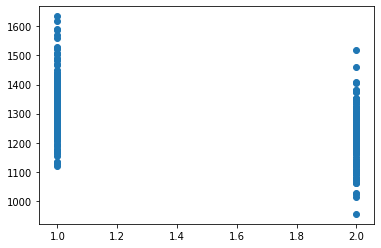

In [18]:
plt.scatter(headbrain['Gender'],headbrain['BrainWeight'])
plt.show()

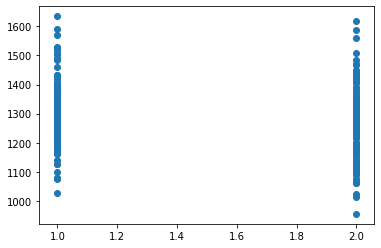

In [19]:
plt.scatter(headbrain['AgeRange'],headbrain['BrainWeight'])
plt.show()

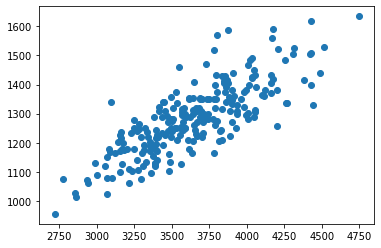

In [20]:
plt.scatter(headbrain['HeadSize'],headbrain['BrainWeight'])
plt.show()

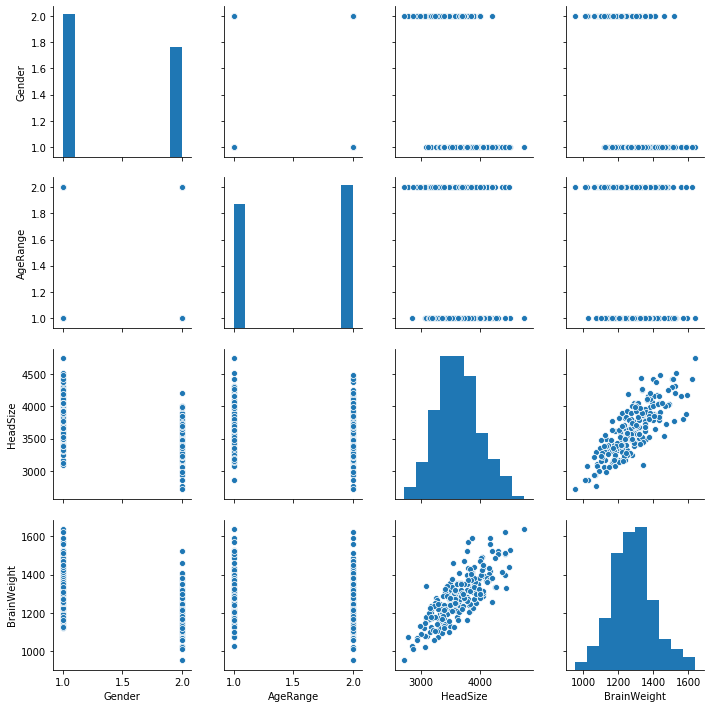

In [21]:
sns.pairplot(headbrain)

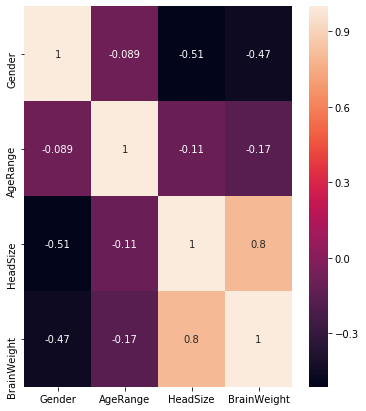

In [22]:
corr_hmap=headbrain.corr()
plt.figure(figsize=(6,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [25]:
headbrain_new=headbrain[(z<3).all(axis=1)]

In [26]:
headbrain_new.shape

(236, 4)

In [28]:
headbrain=headbrain_new
headbrain.shape

(236, 4)

In [29]:
x=headbrain.iloc[:,0:-1]
x.head()

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [30]:
y=headbrain.iloc[:,-1]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [31]:
x.shape

(236, 3)

In [32]:
y.shape

(236,)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=47)

In [46]:
x_train.shape

(153, 3)

In [47]:
y_train.shape

(153,)

In [48]:
lr=LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lr.coef_

array([-22.02493635, -15.51952636,   0.23544708])

In [51]:
lr.intercept_

480.2388946189685

In [52]:
headbrain.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [53]:
lr.score(x_train,y_train)

0.6148665723694707

In [54]:
pred=lr.predict(x_test)
print("predicted result brainweight:",pred)
print("actual brainweight",y_test)

predicted result brainweight: [1286.77221699 1227.56662283 1266.05287387 1355.7582117  1273.37171435
 1316.07474427 1277.01050982 1206.26929629 1311.85667779 1253.3387315
 1273.11628629 1150.33998029 1169.41119384 1242.39978892 1204.25736182
 1218.74799158 1206.14093846 1505.031661   1422.3897356  1274.42059193
 1111.49121193 1428.53134068 1289.14666877 1097.12894    1250.06245334
 1363.63505462 1287.49853921 1355.28731753 1380.24470811 1093.34180573
 1285.72205181 1185.40161437 1344.92764597 1272.19447895 1421.68339435
 1352.22650548 1267.93645051 1392.95885048 1167.27218913 1165.17314638
 1389.66259135 1299.95725352 1338.33512771 1304.68617611 1162.81867557
 1353.18827478 1263.82547329 1176.71005335 1331.97805652 1258.77399534
 1203.55102057 1148.20097558 1190.34600306 1370.84680585 1290.55935126
 1345.76105745 1226.04685109 1277.2459569  1291.03024542 1433.4557484
 1457.00045649 1174.80649572 1261.68646858 1226.28229817 1322.79562037
 1325.15009118 1352.48193354 1127.26616636 1278.0

In [55]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
4664.6283405260165


In [56]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6796231243413806
